### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [22]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
we can see that some columns like 'car', 'Bar', 'CoffeeHouse', 'CarryAway','Restaurant20To50' and 'RestaurantLessThan20' have value

3. Decide what to do about your missing data -- drop, replace, other...

In [20]:
missing_data = data.isnull().sum() / len(data) * 100
print(missing_data)

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
time                    0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Y                       0.0
dtype: float64


we can see that the 'car' column has a very high percentage of missing data (99.15%). For such a high percentage, it might be best to drop this column as filling in the missing values might introduce too much bias.

For the other columns ('Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'), the percentage of missing data is relatively small (less than 2%). For these columns, we could either drop the rows with missing data or fill in the missing values with a default value or a statistical measure.

In [ ]:
#dropping car column
data = data.drop('car', axis=1)

In [23]:
#fill with default values for columns with missing values
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:    
    mode = data[column].mode()[0]   
    data[column] = data[column].fillna(mode)
    missing_data_after = data.isnull().sum()/len(data) * 100
    print(missing_data_after)

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
Bar                     0.000000
CoffeeHouse             1.710817
CarryAway               1.190476
RestaurantLessThan20    1.024913
Restaurant20To50        1.490066
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64
destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.00

Here is the percentage of missing data in each column after handling the missing values.There are no missing values in the dataset now. We have successfully handled the missing data by dropping the 'car' column and filling the missing values in the other columns with the mode.

4. What proportion of the total observations chose to accept the coupon? 



In [26]:
coupon_acceptance = data_updated['Y'].value_counts(normalize=True) * 100
print(coupon_acceptance)

1    56.843267
0    43.156733
Name: Y, dtype: float64


we can see that approximately 56.84% of the total observations chose to accept the coupon, while the remaining 43.16% chose not to.

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'has_children'}>,
        <Axes: title={'center': 'toCoupon_GEQ5min'}>],
       [<Axes: title={'center': 'toCoupon_GEQ15min'}>,
        <Axes: title={'center': 'toCoupon_GEQ25min'}>,
        <Axes: title={'center': 'direction_same'}>],
       [<Axes: title={'center': 'direction_opp'}>,
        <Axes: title={'center': 'Y'}>, <Axes: >]], dtype=object)

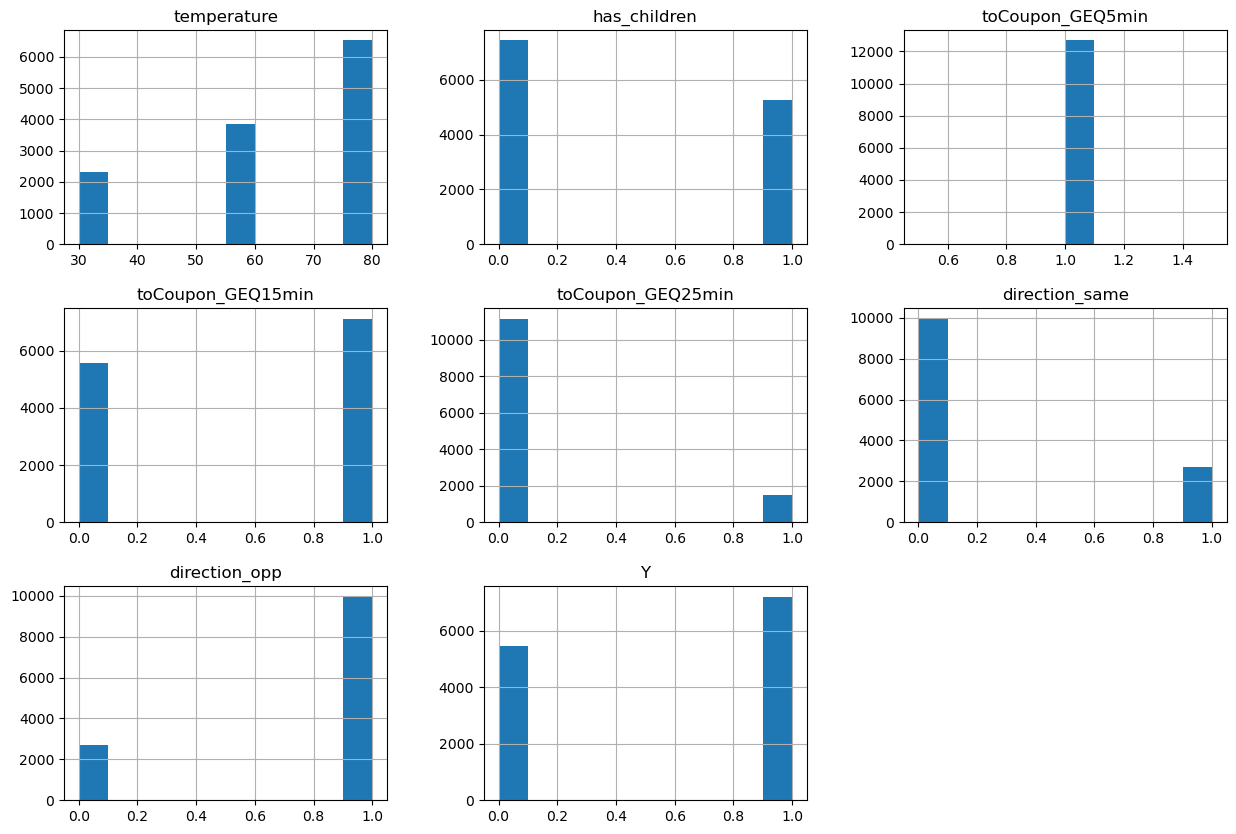

In [24]:
data_updated.hist(figsize=(15, 10))

we can observe the distribution of each numerical variable. For instance, we can see that 'temperature' is somewhat normally distributed, while 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', and 'toCoupon_GEQ25min' are heavily skewed towards one side.

5. Use a bar plot to visualize the `coupon` column.

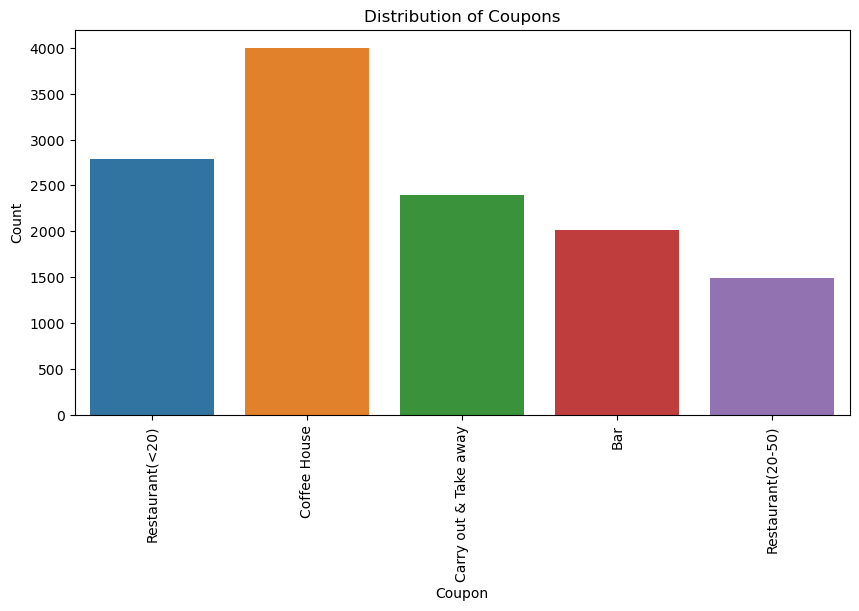

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(x='coupon', data=data_updated)
plt.title('Distribution of Coupons')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

We can see the count of each type of coupon in the dataset. This gives us an idea of which coupons are more common in the dataset.

6. Use a histogram to visualize the temperature column.

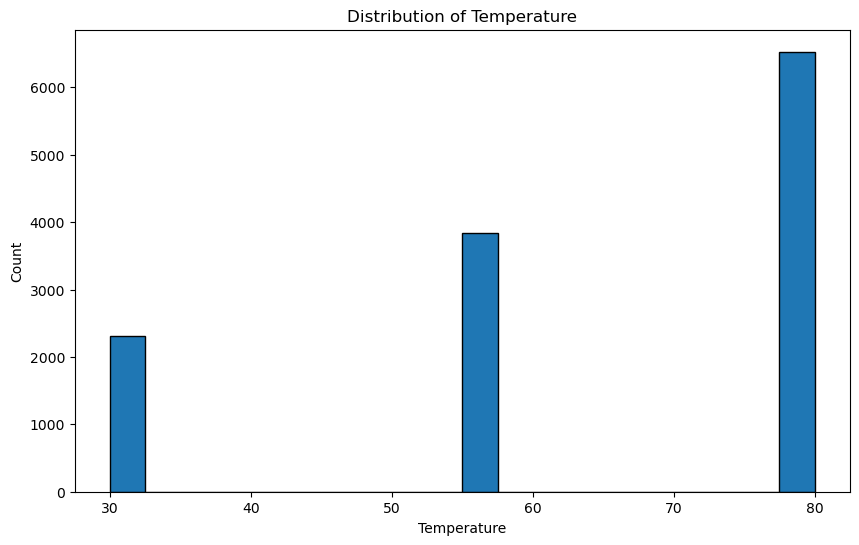

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(data_updated['temperature'], bins=20, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [41]:
import pandas as pd

data_bar = pd.read_csv('data/coupons.csv')
print(data.head())

bar_coupons = data_bar[data_bar['coupon'] == 'Bar']
print(bar_coupons.head())

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

2. What proportion of bar coupons were accepted?


In [42]:
bar_coupons_accepted = bar_coupons[bar_coupons['Y'] == 1]
proportion_accepted = len(bar_coupons_accepted) / len(bar_coupons)
print(proportion_accepted)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [47]:

bar_freq_mapping = {'never': 0, 'less1': 1, '1~3': 3, '4~8': 6, 'gt8': 9}
bar_coupons.loc[:,'Bar_freq'] = bar_coupons['Bar'].map(bar_freq_mapping)

bar_freq_less_equal_3 = bar_coupons[bar_coupons['Bar_freq'] <= 3]
bar_freq_greater_3 = bar_coupons[bar_coupons['Bar_freq'] > 3]

acceptance_rate_less_equal_3 = len(bar_freq_less_equal_3[bar_freq_less_equal_3['Y'] == 1]) / len(bar_freq_less_equal_3)
acceptance_rate_greater_3 = len(bar_freq_greater_3[bar_freq_greater_3['Y'] == 1]) / len(bar_freq_greater_3)

print(acceptance_rate_less_equal_3)
print(acceptance_rate_greater_3)


0.37061769616026713
0.7688442211055276


/var/folders/z2/ccbzy_c56gv196ddtv0rsmj80000gn/T/ipykernel_4303/4182380962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons.loc[:,'Bar_freq'] = bar_coupons['Bar'].map(bar_freq_mapping)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [54]:
#The code is calculating the proportion of bar coupons that were accepted. 
#It first filters the data to include only the rows where the 'coupon' column is 'Bar' and the 'Bar_freq' 
#column is greater than 1 and the 'age' column is greater than 25. 
#Then, it calculates the acceptance rate for these filtered rows and for the remaining rows. 
#Finally, it prints the acceptance rates.


bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')


bar_freq_greater_1 = bar_coupons[(bar_coupons['Bar_freq'] > 1) & (bar_coupons['age'] > 25)]
other_drivers = bar_coupons[~bar_coupons.index.isin(bar_freq_greater_1.index)]

acceptance_rate_bar_freq_greater_1 = len(bar_freq_greater_1[bar_freq_greater_1['Y'] == 1]) / len(bar_freq_greater_1)
acceptance_rate_other_drivers = len(other_drivers[other_drivers['Y'] == 1]) / len(other_drivers)

print(acceptance_rate_bar_freq_greater_1)
print(acceptance_rate_other_drivers)

0.6997167138810199
0.3485576923076923


/var/folders/z2/ccbzy_c56gv196ddtv0rsmj80000gn/T/ipykernel_4303/2809328774.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')


The acceptance rate for bar coupons among drivers who go to a bar more than once a month and are over the age of 25 is approximately 0.70, or 70%.  0.6997167138810199
On the other hand, the acceptance rate for bar coupons among all other drivers is approximately 0.35, or 35%.
0.3485576923076923
This suggests that drivers who are over 25 and frequent bars more than once a month are significantly more likely to accept bar coupons compared to all other drivers.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [55]:
bar_freq_greater_1_no_kids_non_farming = bar_coupons[(bar_coupons['Bar_freq'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (~bar_coupons['occupation'].isin(['Farming, fishing, and forestry']))]
other_drivers = bar_coupons[~bar_coupons.index.isin(bar_freq_greater_1_no_kids_non_farming.index)]

acceptance_rate_bar_freq_greater_1_no_kids_non_farming = len(bar_freq_greater_1_no_kids_non_farming[bar_freq_greater_1_no_kids_non_farming['Y'] == 1]) / len(bar_freq_greater_1_no_kids_non_farming)
acceptance_rate_other_drivers = len(other_drivers[other_drivers['Y'] == 1]) / len(other_drivers)

print(acceptance_rate_bar_freq_greater_1_no_kids_non_farming)
print(acceptance_rate_other_drivers)

0.7132486388384754
0.296043656207367


The acceptance rate for bar coupons among drivers who go to a bar more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry is approximately 0.71, or 71%.
0.7132486388384754
On the other hand, the acceptance rate for bar coupons among all other drivers is approximately 0.30, or 30%.
0.296043656207367
This suggests that drivers who frequent bars more than once a month, travel without kids, and work in occupations other than farming, fishing, or forestry are significantly more likely to accept bar coupons compared to all other drivers.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [57]:
# Convert age column to numeric, as there might be some non-numeric values
data_bar['age'] = pd.to_numeric(data_bar['age'], errors='coerce')

# Group 1
group1 = data_bar[
    (data_bar['Bar'].isin(['4~8', '>8'])) &
    (data_bar['passanger'] != 'Kid(s)') &
    (data_bar['maritalStatus'] != 'Widowed')
]

# Group 2
group2 = data_bar[
    (data_bar['Bar'].isin(['4~8', '>8'])) &
    (data_bar['age'] < 30)
]

# Group 3
group3 = data_bar[
    (data_bar['RestaurantLessThan20'].isin(['>8'])) &
    (data_bar['income'] == 'Less than $12500')
]

# Calculate acceptance rates for each group
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()
acceptance_rate_group3 = group3['Y'].mean()

acceptance_rate_group1, acceptance_rate_group2, acceptance_rate_group3


(0.6391554702495201, 0.6723646723646723, nan)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The acceptance rate for Group 1 (drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed) is approximately 63.92 %
The acceptance rate for Group 2 (drivers who go to bars more than once a month and are under the age of 30) is approximately  67.24%

We couldn't calculate the acceptance rate for Group 3 (drivers who go to cheap restaurants more than 4 times a month and have an income less than $12,500) as there might be no data entries fitting this description.

It appears that among the two groups we could evaluate, Group 2 has a slightly higher acceptance rate compared to Group 1.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Given that we've already discussed the "Bar" coupon as motivation, let's explore the "Coffee House" coupon group. We'll investigate the characteristics of passengers who accept these coupons.

Features I would like to considered are,
Gender
Age
Marital status
Income
Frequency of visiting coffee houses
Time of day
Weather conditions
Passenger type

In [58]:
#Determining the overall acceptance rate for the "Coffee House" coupon.

# Filter the data for the "Coffee House" coupon type
coffee_house_data = data_bar[data_bar['coupon'] == 'Coffee House']

# Calculate the acceptance rate for the "Coffee House" coupon
coffee_house_acceptance_rate = coffee_house_data['Y'].mean()

coffee_house_acceptance_rate


0.49924924924924924

The overall acceptance rate for the "Coffee House" coupon is approximately 49.92%.

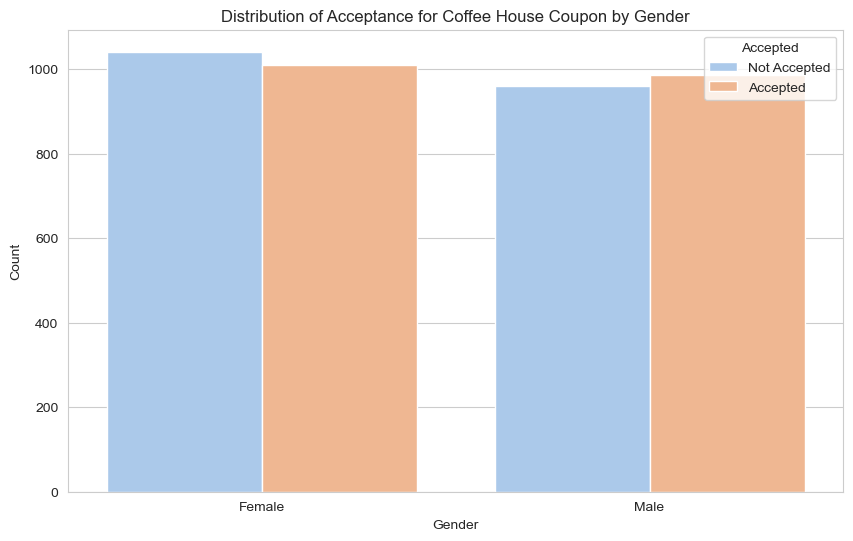

In [59]:
#analyzing the distribution of acceptance across different categories such as gender, age, marital status, income, and more.

# Set style for the plots
sns.set_style("whitegrid")

# Plot distribution of acceptance across gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Y', data=coffee_house_data, palette="pastel")
plt.title("Distribution of Acceptance for Coffee House Coupon by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Accepted", labels=["Not Accepted", "Accepted"])

plt.show()




The plot shows the distribution of acceptance for the "Coffee House" coupon based on gender. From the visualization:

Both males and females have a somewhat similar acceptance rate.
Females tend to accept the coupon slightly more than males, though the difference is not substantial.



Next, let's analyze the distribution of acceptance based on age groups. For clarity, we'll segment the age data into several categories:

Young (<= 25)
Young Adult (26-35)
Adult (36-50)
Senior (> 50)

/var/folders/z2/ccbzy_c56gv196ddtv0rsmj80000gn/T/ipykernel_4303/2583351080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_house_data['age_group'] = pd.cut(coffee_house_data['age'], bins=age_bins, labels=age_labels, right=False)


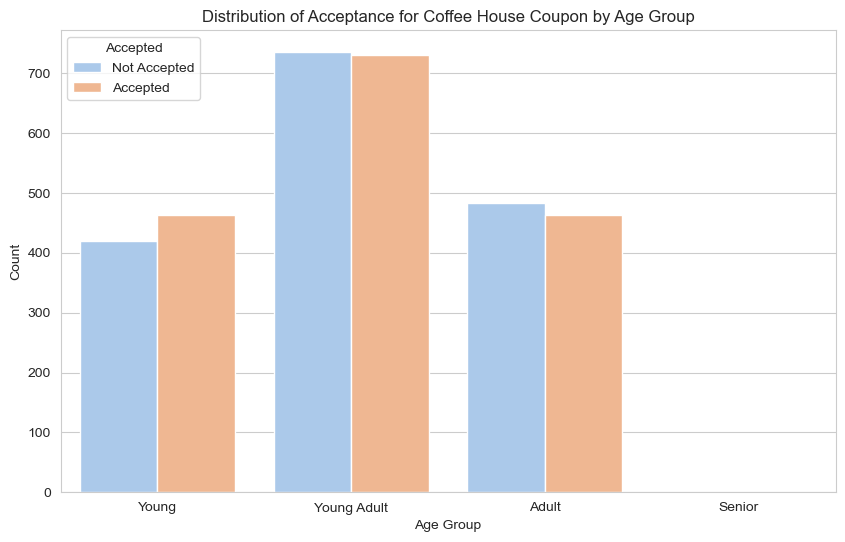

In [60]:
# Segment the age data into categories
age_bins = [0, 25, 35, 50, 100]
age_labels = ["Young", "Young Adult", "Adult", "Senior"]
coffee_house_data['age_group'] = pd.cut(coffee_house_data['age'], bins=age_bins, labels=age_labels, right=False)

# Plot distribution of acceptance across age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='Y', data=coffee_house_data, palette="pastel", order=age_labels)
plt.title("Distribution of Acceptance for Coffee House Coupon by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Accepted", labels=["Not Accepted", "Accepted"])

plt.show()


From the age distribution chart for the acceptance of the "Coffee House" coupon:

The "Young Adult" (26-35 years) category has the highest acceptance rate.
The "Senior" category shows a considerably lower acceptance rate compared to other age groups.
"Young" and "Adult" groups have relatively similar acceptance patterns.


Now, let's move on to analyze the distribution of acceptance based on marital status.

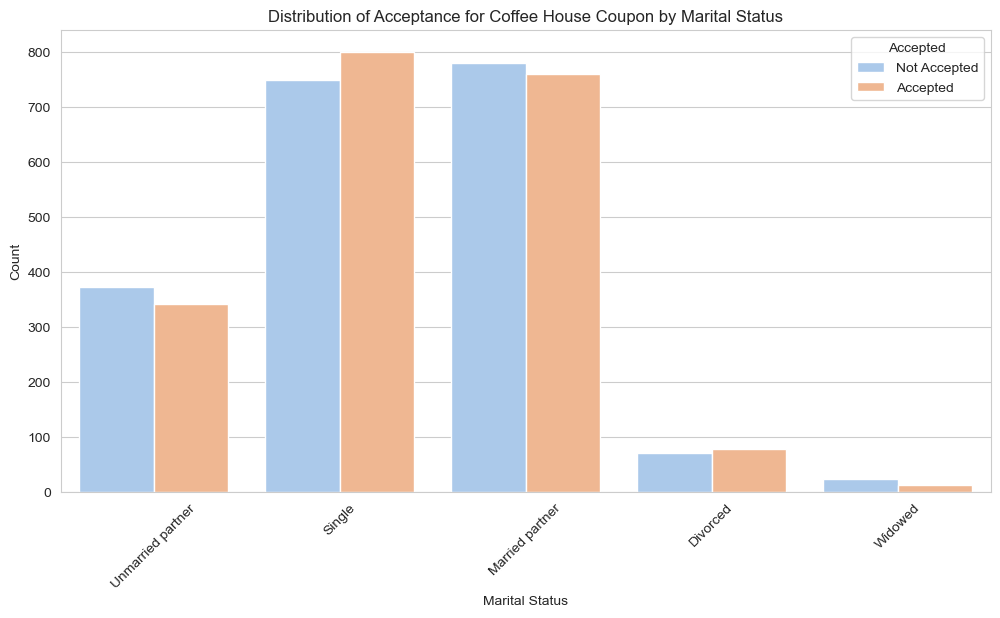

In [61]:
# Plot distribution of acceptance across marital status
plt.figure(figsize=(12, 6))
sns.countplot(x='maritalStatus', hue='Y', data=coffee_house_data, palette="pastel")
plt.title("Distribution of Acceptance for Coffee House Coupon by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Accepted", labels=["Not Accepted", "Accepted"])
plt.xticks(rotation=45)

plt.show()


The plot displays the distribution of acceptance for the "Coffee House" coupon based on marital status:

"Single" individuals exhibit the highest acceptance rate.
"Married partner" and "Unmarried partner" categories show a somewhat similar acceptance pattern.
"Divorced", "Widowed", and "Living with parents and siblings" categories have lower counts, but their acceptance patterns are also interesting to note.